# Project 2 

The framework should import only torch.empty, and use no pre-existing neural-network python toolbox. Your code should work with autograd globally off, which can be achieved with torch . set˙grad˙enabled ( False )

In [1]:
import math
import torch 
torch.set_grad_enabled(False)

### Build the data

Generates a training and a test set of 1, 000 points sampled uniformly in [0, 1]², each with a label 0 if outside the disk centered at (0.5, 0.5) of radius 1/sqrt(2π), and 1 inside.

In [2]:
def build_data(n):
       
    x = torch.empty(n, 2) #(n,2)
    x = x.uniform_(0, 1)
    
    x_centered = x - 0.5
    norm_squared = x_centered.pow(2).sum(dim=1)  #(n,)
    
    r_squared = 1/ (2*math.pi)
    
    y = norm_squared.sub(r_squared).sign().add(1).div(2)
    return x, y

In [3]:
X_train, y_train = build_data(1000)  #(1000,2) , #(1000)
X_test, y_test = build_data(1000)  #(1000,2) , #(1000)

In [4]:
x = X_train[:,0]
y = X_train[:,1]
colors = { 1.0 : 'g', 0 : 'y'}

In [5]:
c = [ colors[label] for label in y_train.numpy()]

In [6]:
def one_hot_encoding(target):
    encoded = torch.empty(target.shape[0], 2)
    for i in range(target.shape[0]): 
        if(target[i]):
            encoded[i,0] = 0
            encoded[i,1] = target[i]
        else : 
            encoded[i,0] = 1
            encoded[i,1] = target[i]
    return encoded

In [7]:
encoded_y_train = one_hot_encoding(y_train)
encoded_y_test = one_hot_encoding(y_test)

### Visualize the data

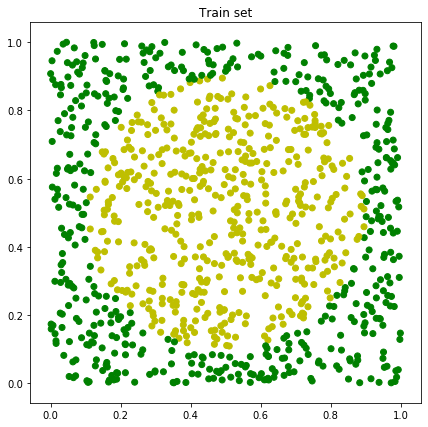

In [8]:
import matplotlib.pyplot as plt  # This is python's popular plotting library.

plt.figure(figsize=(7,7))
plt.scatter(x, y, c = c)
plt.title('Train set')
plt.show()

### Build the network

In [9]:
from linear import Linear
from activation_function.tanh import Tanh
from activation_function.sigmoid import Sigmoid
from sequential import Sequential
from optimizer.sgd import SGD
from loss.mse import MSELoss
from activation_function.relu import ReLU

In [10]:
input_units = 2
hidden_units = 25
output_units = 2

model = Sequential(
            Linear(input_units, hidden_units),
            ReLU(),
            Linear(hidden_units, hidden_units),
            ReLU(),
            Linear(hidden_units, hidden_units),
            ReLU(),
            Linear(hidden_units, output_units),
            Sigmoid()
)

In [11]:
def train_model(model, X_train, y_train, epochs, mini_batch_size , lr = 0.01):
    
    total_loss = []
    
    criterion = MSELoss(model)
    optimizer = SGD(model, lr)
    
    #one hot encoding 
    encoded_y_train = one_hot_encoding(y_train)
    
    number_batches =  X_train.size(0) // mini_batch_size
    
    for epoch in range(epochs):
        
        loss_epoch = 0
        
        for index in range(0, X_train.size(0), mini_batch_size):
            X_train_batched = X_train[index:(index+mini_batch_size)]
            y_train_batched = encoded_y_train[index:(index+mini_batch_size)]
            
            #forward pass
            output = model.forward(X_train_batched)
            loss = criterion.forward(output, y_train_batched)
            loss_epoch += loss.item() 
                        
            #backward pass and update parameters gradient
            criterion.backward()  
            #update parameters
            optimizer.step()
        
        total_loss.append(loss_epoch / number_batches)
        
    return model, total_loss

In [12]:
epochs = 25
mini_batch_size = 5
model_trained, loss_epoch =  train_model(model, X_train, y_train, epochs, mini_batch_size , lr = 0.1)

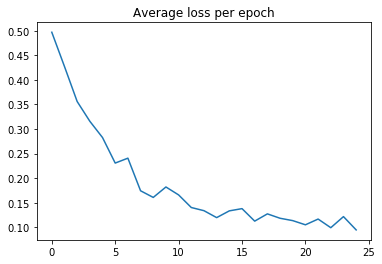

In [22]:
import matplotlib.pyplot as plt

plt.plot(loss_epoch)
plt.title('Average loss per epoch')
plt.show()

## Pytorch

In [14]:
import torch.nn as nn

torch.set_grad_enabled(True)

model_torch = nn.Sequential(
            nn.Linear(input_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_units),
            nn.Sigmoid()
)

In [15]:
def train_model(model, train_input, train_target, mini_batch_size):
    criterion = nn.MSELoss()
    eta = 1e-1

    for e in range(25):
        sum_loss = 0
        for b in range(0, train_input.size(0), mini_batch_size):
            output = model(train_input.narrow(0, b, mini_batch_size))
            loss = criterion(output, train_target.narrow(0, b, mini_batch_size))
            model.zero_grad()
            loss.backward()
            sum_loss = sum_loss + loss.item()
            with torch.no_grad():
                for p in model.parameters():
                    #print(p)
                    p -= eta * p.grad
        print(e, sum_loss)

def compute_nb_errors(model, input, target, mini_batch_size):
    nb_errors = 0

    for b in range(0, input.size(0), mini_batch_size):
        output = model(input.narrow(0, b, mini_batch_size))
        _, predicted_classes = output.max(1)
        for k in range(mini_batch_size):
            if target[b + k, predicted_classes[k]] <= 0:
                nb_errors = nb_errors + 1

    return nb_errors

In [16]:
#one hot encoding 
encoded_y_train = one_hot_encoding(y_train)

In [17]:
train_model(model_torch, X_train, encoded_y_train, 5)

0 50.0378952473402
1 49.89674514532089
2 49.787998005747795
3 49.63140217959881
4 49.37069383263588
5 48.938000321388245
6 48.16107948124409
7 46.65721516311169
8 43.5587494969368
9 38.005321241915226
10 31.539836306124926
11 26.12113909982145
12 22.108754650224
13 19.462366573279724
14 17.789414439117536
15 16.218327109643724
16 15.765315515105613
17 15.163209582744457
18 14.347095193810674
19 14.033533037076268
20 13.936693606588051
21 12.958676598020247
22 13.114836402013225
23 12.216578168844535
24 13.030069791294409
